# Salary prediction

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('C:\\Users\\USER\\Documents\\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
data.shape

(30, 2)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [30]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [31]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

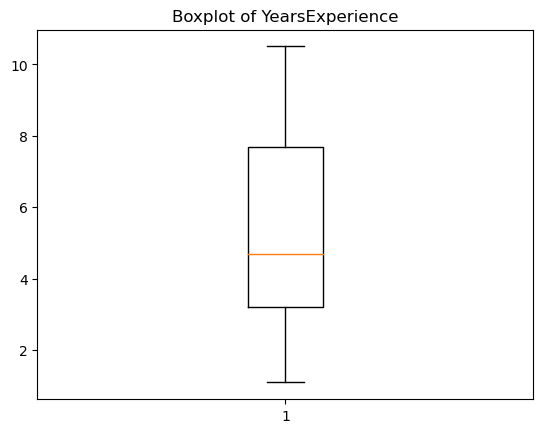

In [32]:
#boxplot
plt.boxplot(x='YearsExperience',data=data)
plt.title("Boxplot of YearsExperience")
plt.show()

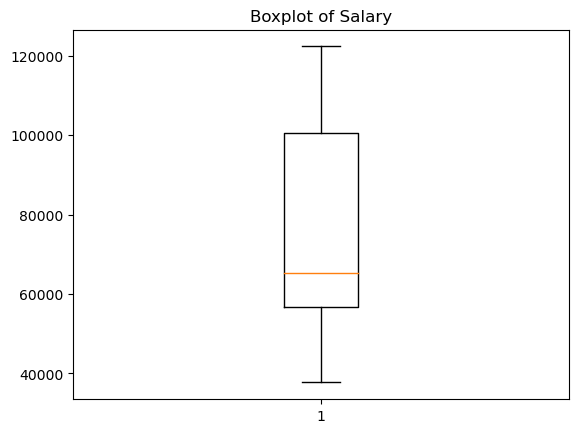

In [33]:
plt.boxplot(x='Salary',data=data)
plt.title("Boxplot of Salary")
plt.show()

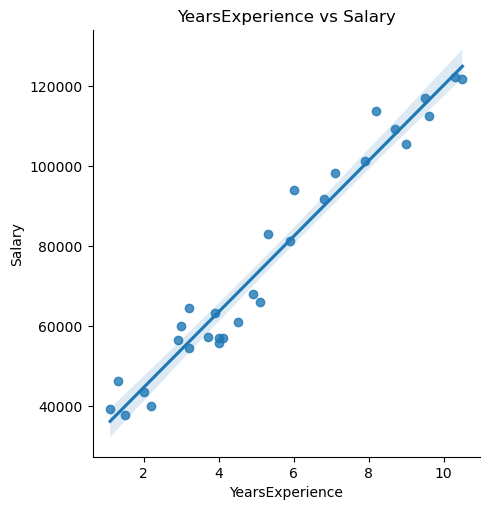

In [15]:
import seaborn as sns
#linearity
sns.lmplot(x='YearsExperience',y='Salary',data=data)
plt.title('YearsExperience vs Salary')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14796\657717018.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


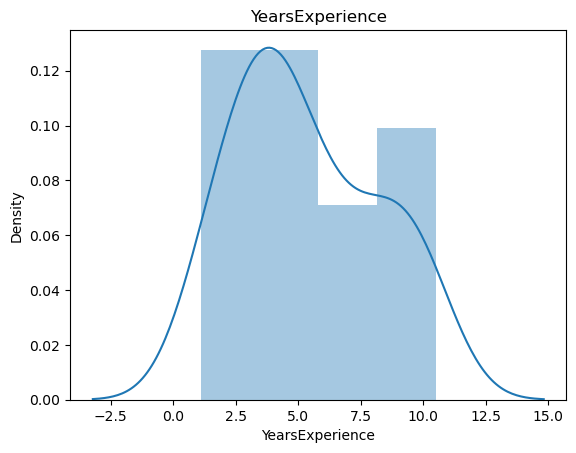

In [17]:
#Normality
sns.distplot(data['YearsExperience'])
plt.title('YearsExperience')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
#creating the model object
model=LinearRegression()
#fitting the dataset
model.fit(data[['YearsExperience']],data['Salary'])

LinearRegression()

In [38]:
model.score(data[['YearsExperience']],data['Salary'])

0.9569566641435086

Text(0, 0.5, 'Salary')

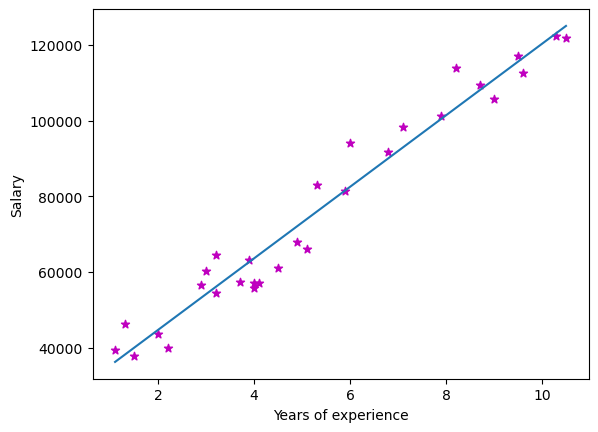

In [39]:
plt.scatter(data['YearsExperience'],data['Salary'],color='m',marker='*')
plt.plot(data['YearsExperience'],model.predict(data[['YearsExperience']]))
plt.xlabel('Years of experience')
plt.ylabel('Salary')

In [40]:
model.predict([[8]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101391.89877031])

In [41]:
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [42]:
data=data.rename(columns={"YearsExperience":"X",'Salary':'y'})
data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
model = sm.ols('y~X',data=data).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.14e-20
Time:                        15:08:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64